In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# !pip install mlxtend
# !pip install networkx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import networkx as nx
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
plt.rcParams['font.family'] = 'tahoma'
# !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
# mpl.rc('font', family='TH Sarabun New', size=10)

In [3]:
# import numpy as np

# from PIL import Image

# from wordcloud import WordCloud

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf  -P '/content/drive/MyDrive/THSarabunNew.ttf'

# # !pip install -U --pre matplotlib  

# import matplotlib as mpl

# mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/THSarabunNew.ttf/thsarabunnew-webfont.ttf') # 3.2+

# mpl.rc('font', family='TH Sarabun New')

In [4]:
import matplotlib.font_manager as fm

In [8]:

# df = pd.read_csv('/content/drive/MyDrive/BADS7105_CRM_ANALYTICS_AND_INTELLIGENT/HW_07_Product Recommendation/BreadBasket_DMS.csv')

In [5]:
df_2 = pd.read_excel('./Customer Preference Survey.xlsx')

In [6]:
df_2 =  df_2.dropna()

In [33]:
df_2.head(2)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,1


In [32]:
df_2.shape

(41, 62)

In [7]:
ls_loop = df_2.drop(["ประทับเวลา"],axis=1).columns

In [8]:
for i in ls_loop :
  df_2[i] =  np.where(df_2[i] == "เคย" , 1 , 0 )

In [11]:
df_2.head(5)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,1
4,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,1,1,1
5,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2021-03-20 11:54:33.800,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,1,1


In [41]:
df_2_tra = df_2.T.iloc[1:,:]

In [42]:
df_2_tra["เคย"] = df_2_tra.sum(axis=1)
df_2_tra["ไม่เคย"] = 41-df_2_tra["เคย"]

In [43]:
df_2_tra

,2,3,4,5,8,10,11,12,14,15,...,40,41,42,43,44,45,46,47,เคย,ไม่เคย
จักรยานเสือภูเขา,0,0,1,0,0,0,0,1,1,0,...,1,1,0,0,1,0,0,0,14.0,27.0
คอลลาเจน,0,1,0,0,0,0,1,0,1,0,...,1,1,0,1,0,0,1,1,23.0,18.0
Brownie อวกาศ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,4.0,37.0
แม่โขง,0,1,0,1,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,12.0,29.0
Botox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
หมอนสุขภาพสำหรับคนนอนไม่หลับ,0,1,1,0,1,0,0,0,1,0,...,1,0,1,1,0,0,0,1,16.0,25.0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,4.0,37.0
น้ำส้มดีโด้,1,1,1,0,1,0,0,0,1,1,...,1,1,0,1,1,0,0,1,29.0,12.0
Software ถูกลิขสิทธิ์,1,0,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,33.0,8.0


In [47]:
df_2_tra = df_2_tra.reset_index().rename({"index":"Activity"},axis=1)[["Activity","เคย","ไม่เคย"]]

In [136]:
df_2_tra.to_csv("data_count_ac.csv")

In [50]:
data_in = df_2.drop(["ประทับเวลา"],axis=1)

In [51]:
data_in.shape

(41, 61)

In [52]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(data_in, min_support=0.5, use_colnames=True)

In [53]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.560976,0.951220,0.536585,0.956522,1.005574,0.002974,1.121951
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.951220,0.560976,0.536585,0.564103,1.005574,0.002974,1.007174
2,(กระเป๋า),(คอลลาเจน),1.000000,0.560976,0.560976,0.560976,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf
4,(คอลลาเจน),(ชาบู),0.560976,1.000000,0.560976,1.000000,1.000000,0.000000,inf
5,(ชาบู),(คอลลาเจน),1.000000,0.560976,0.560976,0.560976,1.000000,0.000000,1.000000
6,(เม็ดมะม่วงหิมพานต์),(คอลลาเจน),0.902439,0.560976,0.512195,0.567568,1.011751,0.005949,1.015244
7,(คอลลาเจน),(เม็ดมะม่วงหิมพานต์),0.560976,0.902439,0.512195,0.913043,1.011751,0.005949,1.121951
8,(คอลลาเจน),(โรตี),0.560976,0.975610,0.560976,1.000000,1.025000,0.013682,inf
9,(โรตี),(คอลลาเจน),0.975610,0.560976,0.560976,0.575000,1.025000,0.013682,1.032999


In [54]:
rules.shape

(290792, 9)

In [83]:
ls_combination = []
for i in zip(rules["antecedents"].tolist(),rules["consequents"].tolist()) :
  ls_combination.append(" -> ".join([next(iter(i[0])),next(iter(i[1]))]))

In [84]:
rules["Combination"] = ls_combination

In [85]:
rules.shape

(290792, 10)

In [55]:
sim_rule = rules[ (rules['lift'] >= 1.1) &
       (rules['confidence'] >= 0.5) ]

In [56]:
sim_rule.shape

(142236, 9)

In [58]:
sim_rule = sim_rule.sort_values(by=["lift"],ascending=False)

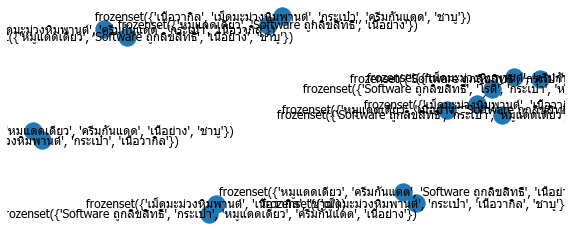

In [59]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(sim_rule.iloc[:10,:],source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [77]:
item_item_matrix = pd.DataFrame(index=data_in.columns,columns=data_in.columns)

In [61]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(data_in.iloc[:,i],data_in.iloc[:,j])

In [62]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [65]:
links

,item,related item,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1.0
1,จักรยานเสือภูเขา,คอลลาเจน,0.557278
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.267261
3,จักรยานเสือภูเขา,แม่โขง,0.385758
4,จักรยานเสือภูเขา,Botox,0.404061
...,...,...,...
3716,ครีมกันแดด,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.624695
3717,ครีมกันแดด,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.312348
3718,ครีมกันแดด,น้ำส้มดีโด้,0.841021
3719,ครีมกันแดด,Software ถูกลิขสิทธิ์,0.89715


In [63]:
links_filtered=links.loc[ (links['value'] >= 0.5) & 
                         (links['item'] != links['related item']) ]

In [76]:
links_filtered.sort_values(by=["value"],ascending=False)

,item,related item,value
2012,ชาบู,ครีมกันแดด,1.0
3692,ครีมกันแดด,ชาบู,1.0
1621,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1,1.0
1983,ชาบู,กระเป๋า,1.0
2161,เครื่องย่อยเศษอาหาร.1,เครื่องย่อยเศษอาหาร,1.0
...,...,...,...
592,คอร์ส bikini wax,กรรไกรตัดขนจมูก,0.5
590,คอร์ส bikini wax,ไดร์เป่าผม Dyson,0.5
355,กัญชา,เกมส์ FIFA Online,0.5
315,กัญชา,เก้าอี้นวดไฟฟ้า,0.5


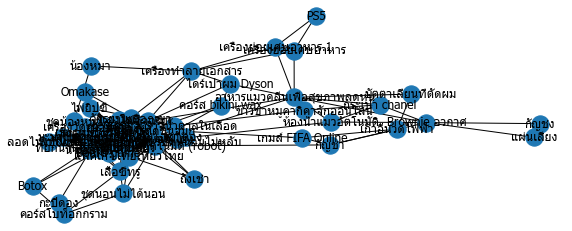

In [73]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
pos = nx.spectral_layout(GA)
nx.draw(GA,with_labels=True)
plt.savefig("networkx_graph.png")
# nx.draw_networkx(GA,pos,with_labels=True)
plt.show()

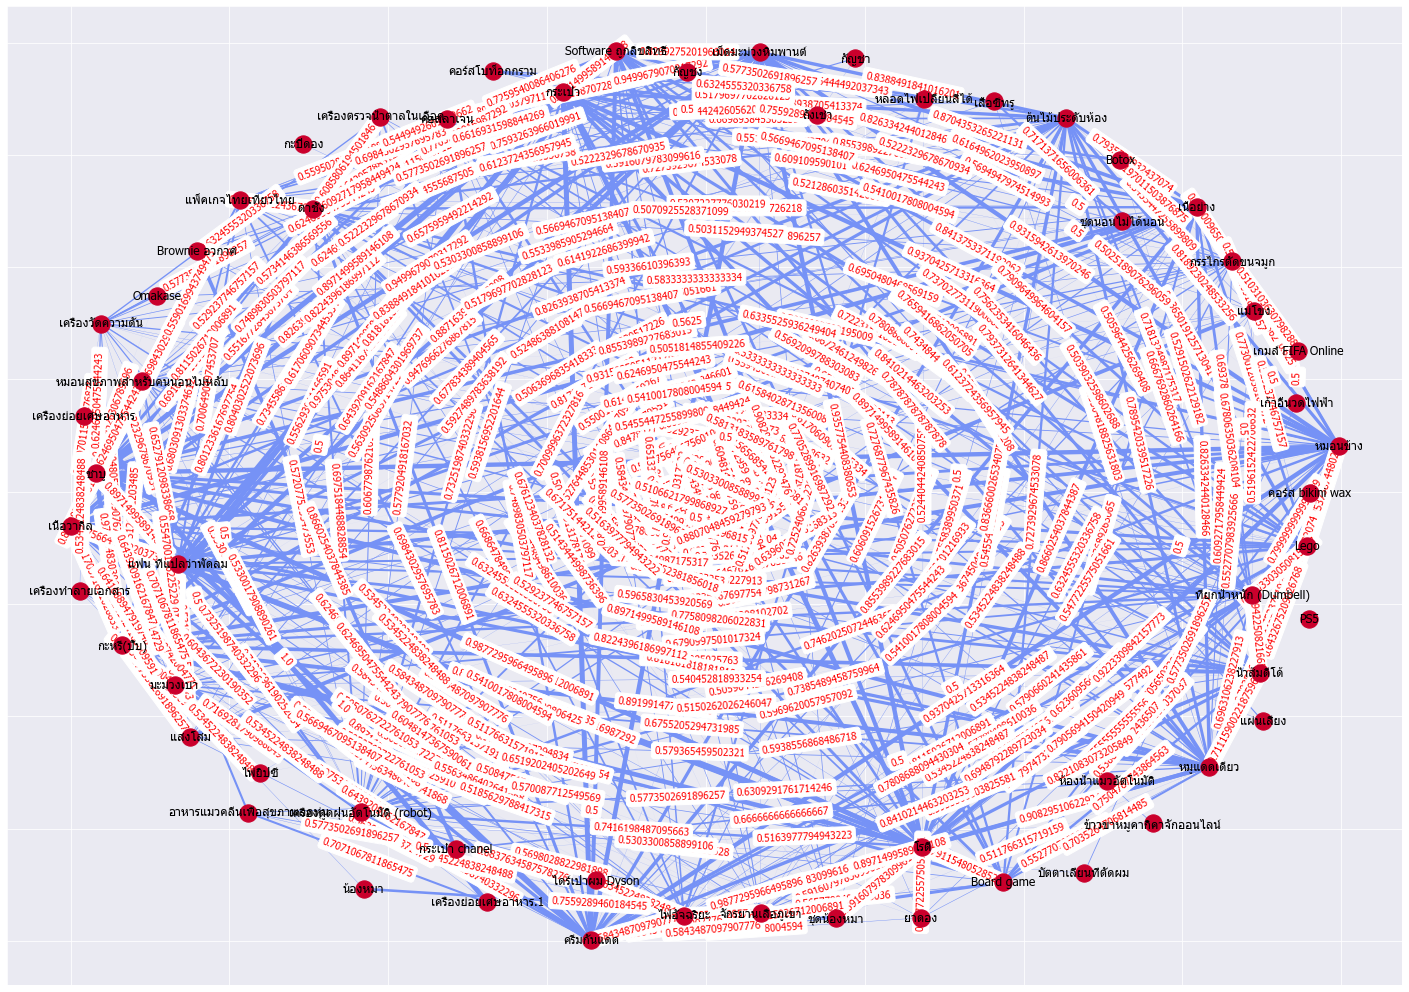

In [74]:
fig, ax =plt.subplots(figsize=(25,18))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])
#GA.nodes()
# nx.draw(GA,with_labels=True,node_color='orange')
# plt.show()
weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}
#pos = nx.spring_layout(GA)
pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = '#ca002c') # #e636e1 ##f9c3ff
nx.draw_networkx_edges(GA, pos,edge_color='#7692f6',arrowsize=10, width=weight2, ax=ax ) ##, labels=True)
edge_labels = nx.get_edge_attributes(GA, 'value')
#edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red')#,  **labels_params)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax)

In [80]:
nw_df = rules[["lift","support","antecedents","consequents"]]
nw_df["val"] = nw_df["antecedents"].astype(str) + "->" + nw_df["consequents"].astype(str)

<ipython-input-80-f7f8ea18f33a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df["val"] = nw_df["antecedents"].astype(str) + "->" + nw_df["consequents"].astype(str)


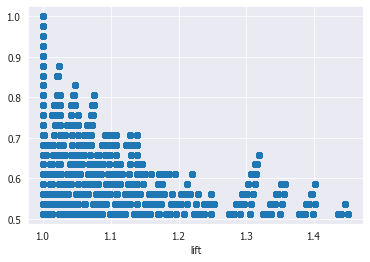

In [82]:
ax = nw_df.set_index('lift')['support'].plot(style='o')
plt.savefig("Lift_x_Support.png")

In [37]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(nw_df.lift, nw_df.support, nw_df.val, ax)

fig.canvas.draw()

In [65]:
nw_df.head(5)

,lift,support,antecedents,consequents,val
0,1.130235,0.019651,(Coffee),(Alfajores),frozenset({'Coffee'})->frozenset({'Alfajores'})
1,1.130235,0.019651,(Alfajores),(Coffee),frozenset({'Alfajores'})->frozenset({'Coffee'})
2,1.034977,0.029160,(Bread),(Pastry),frozenset({'Bread'})->frozenset({'Pastry'})
3,1.034977,0.029160,(Pastry),(Bread),frozenset({'Pastry'})->frozenset({'Bread'})
4,1.025860,0.019651,(Coffee),(Brownie),frozenset({'Coffee'})->frozenset({'Brownie'})


In [54]:
xs = [i for i in range(len(nw_df.index))]
ys = nw_df["consequents"].tolist()

In [100]:
ls_combination = []
for i in zip(nw_df["antecedents"].tolist(),nw_df["consequents"].tolist()) :
  ls_combination.append(" -> ".join([next(iter(i[0])),next(iter(i[1]))]))

In [68]:
nw_df["val"] = ls_combination

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
data

[(1.1302348693401265, 0.0196513470681458),
 (1.1302348693401265, 0.0196513470681458),
 (1.034977447004919, 0.029160063391442156),
 (1.0349774470049187, 0.029160063391442156),
 (1.025859617554099, 0.0196513470681458),
 (1.025859617554099, 0.0196513470681458),
 (1.101515067094673, 0.054727945060750134),
 (1.1015150670946732, 0.054727945060750134),
 (1.883873678623557, 0.011410459587955626),
 (1.883873678623557, 0.011410459587955626),
 (1.6047812817904374, 0.02377179080824089),
 (1.6047812817904377, 0.02377179080824089),
 (1.083722854986449, 0.02820919175911252),
 (1.083722854986449, 0.02820919175911252),
 (1.0603107236134584, 0.029582673005810883),
 (1.0603107236134584, 0.029582673005810883),
 (1.11674996369621, 0.020602218700475437),
 (1.11674996369621, 0.020602218700475437),
 (1.1898783636857841, 0.03518225039619651),
 (1.1898783636857841, 0.03518225039619651),
 (1.0221928027802587, 0.018806127839408347),
 (1.0221928027802585, 0.018806127839408347),
 (1.154168202215526, 0.0475435816164

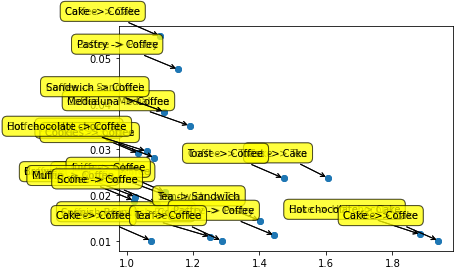

In [86]:
import numpy as np

N = 10
data = values_pnt
labels = ls_combination

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    [i[0] for i in data],  [i[1] for i in data], marker='o',
    cmap=plt.get_cmap('Spectral'))

for label, x, y in zip(ls_combination,nw_df["lift"],nw_df["support"]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [79]:
rules["combination"] = ls_combination

NameError: name 'ls_combination' is not defined

In [133]:
rules.to_csv("data_for_plot.csv")

In [108]:
rules = rules.sort_values(by=["antecedents"])

In [124]:
list(i[1])

['Software ถูกลิขสิทธิ์',
 'เม็ดมะม่วงหิมพานต์',
 'กระเป๋า',
 'ครีมกันแดด',
 'เนื้อย่าง',
 'หมอนข้าง']

In [127]:
ls_combination = []
rndd = 0
for i in zip(rules["antecedents"].tolist(),rules["consequents"].tolist()) :
    xx_ante = ""
    xx_cons = ""
    xx_ante = " ".join(list(i[0]))
    xx_cons = " ".join(list(i[1]))
    ls_combination.append(" -> ".join([xx_ante,xx_cons]))
#     if rndd > 2 :
#         break
    rndd += 1

In [129]:
ls_combination[:10]

['คอลลาเจน -> กะหรี่(ปั๊บ)',
 'กระเป๋า -> โรตี เม็ดมะม่วงหิมพานต์ ครีมกันแดด ที่ยกน้ำหนัก (Dumbell) หมอนข้าง ชาบู',
 'เนื้อย่าง -> แฟน ที่แปลว่าพัดลม โรตี หมูแดดเดียว ครีมกันแดด หมอนข้าง ชาบู กะหรี่(ปั๊บ)',
 'เนื้อวากิล -> Software ถูกลิขสิทธิ์ เม็ดมะม่วงหิมพานต์ กระเป๋า ครีมกันแดด เนื้อย่าง หมอนข้าง',
 'หมูแดดเดียว -> โรตี เม็ดมะม่วงหิมพานต์ กระเป๋า หมอนข้าง ชาบู กะหรี่(ปั๊บ)',
 'ครีมกันแดด -> โรตี กระเป๋า ต้นไม้ประดับห้อง หมูแดดเดียว เนื้อย่าง ชาบู',
 'เนื้อวากิล -> Software ถูกลิขสิทธิ์ โรตี กระเป๋า ครีมกันแดด เนื้อย่าง หมอนข้าง',
 'หมอนข้าง ชาบู -> เนื้อวากิล Software ถูกลิขสิทธิ์ เม็ดมะม่วงหิมพานต์ กระเป๋า หมูแดดเดียว',
 'เนื้อวากิล -> Software ถูกลิขสิทธิ์ เม็ดมะม่วงหิมพานต์ กระเป๋า หมูแดดเดียว หมอนข้าง ชาบู',
 'ครีมกันแดด -> แฟน ที่แปลว่าพัดลม โรตี กระเป๋า ชาบู Board game']

In [130]:
rules["Combination"] = ls_combination

In [132]:
rules = rules.drop("combination",axis=1)